In [1]:
import numpy as np

import cv2 as cv
import matplotlib.pyplot as plt

#my functions
from Plot import plot_cv, plot_img

In [2]:
path = '../../../Data/tree.png'
img_rgb = cv.imread(path, cv.IMREAD_COLOR_RGB)
img = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
img_rgb.shape, img.shape

((579, 1028, 3), (579, 1028))

In [3]:
img = cv.GaussianBlur(img, (3,3), 0)

In [4]:
def otsu(img):
    #calcutate the histogram
    hist, bins = np.histogram(img.ravel(), bins=256, range=(0, 256))
    hist = hist.astype(np.float32)
    P = hist / np.sum(hist) #normalize

    #mean and probability
    bins = np.arange(256)
    omega = np.cumsum(P)
    mu = np.cumsum(P * bins)
    mu_T = mu[-1]

    #variance
    sigma_b2 = (mu_T * omega - mu)**2 / (omega * (1 - omega) + 1e-8)

    #threshold
    t_star = np.argmax(sigma_b2)
    return t_star

In [5]:
def otsu_threshold(img):
    hist, _ = np.histogram(img.ravel(), bins=256, range=(0, 256))
    total = img.size
    P = hist / total

    mu_T = np.sum([i * P[i] for i in range(256)])  #median
    max_var = 0
    t_star = 0

    for t in range(256):
        w0 = np.sum(P[:t+1]) #class 0[0, t]
        w1 = np.sum(P[t+1:]) #class 1: [t+1, 255]

        if w0 == 0 or w1 == 0:
            continue

        mu0 = np.sum([i * P[i] for i in range(t+1)]) / w0
        mu1 = np.sum([i * P[i] for i in range(t+1, 256)]) / w1

        var_between = w0 * w1 * (mu0 - mu1) ** 2

        if var_between > max_var:
            max_var = var_between
            t_star = t

    return t_star

In [6]:
t = otsu(img)
thres = otsu_threshold(img)
t, thres

(np.int64(138), 138)

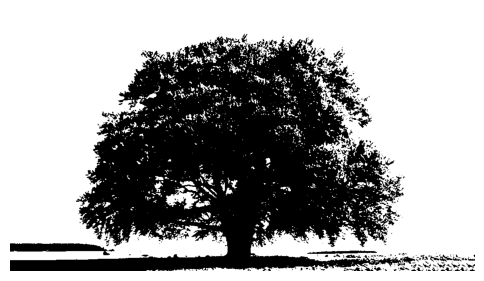

In [7]:
_, segmented = cv.threshold(img, t, 255, cv.THRESH_BINARY)
plot_img(segmented)

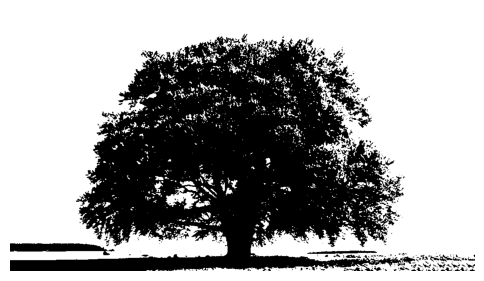

In [8]:
_, segmented_2 = cv.threshold(img, thres, 255, cv.THRESH_BINARY)
plot_img(segmented_2)